==> (422784,) (422784,)
freq==> (422784,)
filtered_data==> [278.00003 276.8617  275.6699  274.42487 273.12686 271.77612 270.3729
 268.91745 267.41013 265.85117]
噪声去除处理完成，已生成文件 output.wav


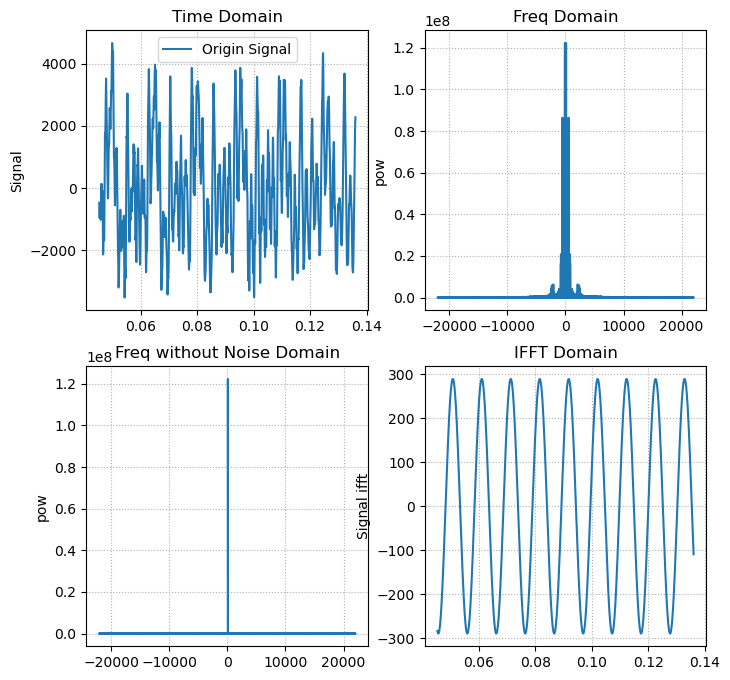

In [3]:
### 傅立叶变换 去噪声

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

# 读取音频文件（WAV格式）
rate, data = wav.read('./sample-9s.wav')

# 如果是立体声，则转换为单声道（取平均）
if data.ndim == 2:
    data = data.mean(axis=1)

# 转换数据类型为浮点型（便于FFT计算）
data = data.astype(np.float32)


###绘制音频时域图:时间/位移图像
times = np.arange(len(data)) / rate ##单位s 除以采样频率,只是为了计算出精准的时间
print('==>', times.shape, data.shape)
# print(times[0:10])
fig = plt.figure('Filter', figsize=(8, 8))
fig.add_subplot(2, 2, 1)
plt.title('Time Domain')
plt.ylabel('Signal')
plt.grid(linestyle=':')
plt.plot(times[2000:6000], data[2000:6000], label='Origin Signal')
plt.legend()

# 对音频信号进行傅立叶变换，得到频域表示
fft_data = np.fft.fft(data) ## 这是个complex_array 模代表振幅
# 得到对应的频率数组（正负频率）
freq = np.fft.fftfreq(len(data), d=1.0/rate) ## 1/rate即2个采样点的时间差
print('freq==>', freq.shape)

### 绘制音频频域图像:频率/能量(振幅)图像
pows = np.abs(fft_data) ## 求模,获取振幅,即能量值
plt.subplot(2, 2, 2)
plt.title('Freq Domain')
plt.ylabel('pow')
plt.grid(linestyle=':')
plt.plot(freq, pows)

## 去噪声方法1
# 将低能噪声去除掉
fun_freq = freq[pows.argmax()]
noise_indices = np.where(freq != fun_freq)[0]
fft_data2 = fft_data.copy()
fft_data2[noise_indices] = 0
filtered_pow = np.abs(fft_data2)
plt.subplot(2, 2, 3)
plt.title('Freq without Noise Domain')
plt.ylabel('pow')
plt.grid(linestyle=':')
plt.plot(freq, filtered_pow)

## 去噪声方法2
# 设计低通滤波器：设定截止频率（例如：4000Hz，高于该频率的部分认为主要为噪声）
# cutoff = 4000  # 截止频率，可以根据实际情况调整
# # 构造掩码，保留低于截止频率的信号，高于截止频率的置零
# mask = np.abs(freq) > cutoff
# ## 滤波
# fft_data[mask] = 0

# plt.subplot(2, 2, 4)
# plt.title('Freq without Noise2 Domain')
# plt.ylabel('pow')
# plt.grid(linestyle=':')
# plt.plot(freq, fft_data)


# 进行逆傅立叶变换，得到滤波后的时域信号
filtered_data = np.fft.ifft(fft_data2)
# 因为输入信号为实数，取实部（舍弃计算误差引入的虚部）
filtered_data = np.real(filtered_data)

# 归一化处理，并转换为16位整型（假设原始WAV为16位）
# filtered_data = filtered_data / np.max(np.abs(filtered_data)) * 32767
# filtered_data = np.int16(filtered_data)

print('filtered_data==>', filtered_data[0:10])

## 逆傅立叶变换后的时间/位移图像
plt.subplot(2, 2, 4)
plt.title('IFFT Domain')
plt.ylabel('Signal ifft')
plt.grid(linestyle=':')
plt.plot(times[2000:6000], filtered_data[2000:6000])


# 将滤波后的音频保存为新文件
wav.write('./output.wav', rate, filtered_data)

print("噪声去除处理完成，已生成文件 output.wav")

plt.show()

In [4]:
### 数据分布
## 二项式分布
## (n p size)
## n次实验, p是概率, size是生成个数
## 某人投篮命中率0.7, 投10次, 投进的个数--生成100组
np.random.binomial(10, 0.7, 100)

array([ 7,  7, 10,  8,  8,  8,  7,  5,  7,  7,  8,  5,  6,  7,  7,  4,  6,
        8,  6,  7,  4,  7,  5,  6,  6,  7,  8,  5,  8,  6,  9,  8,  9,  7,
        8,  7,  9,  9,  9,  6,  5,  7,  5,  7,  8,  7,  8,  7,  8,  6,  7,
        8,  4,  3, 10,  6,  6,  9,  6,  9,  7,  8,  3,  7,  9,  9,  4,  6,
        6,  3,  8,  5,  6,  7,  9,  6,  7,  7,  6,  5,  8,  8,  8,  4,  9,
       10,  9,  7,  7,  5,  9,  6,  8,  7,  6,  8,  9,  6,  6,  6])

In [5]:
arr = np.random.binomial(10, 0.7, 100)
## 投进去5个球的概率
for i in range(11):
    p = sum(arr == i) / 100
    print(f'投进{i}个球的概率是:{p}')

投进0个球的概率是:0.0
投进1个球的概率是:0.0
投进2个球的概率是:0.0
投进3个球的概率是:0.0
投进4个球的概率是:0.05
投进5个球的概率是:0.13
投进6个球的概率是:0.24
投进7个球的概率是:0.28
投进8个球的概率是:0.18
投进9个球的概率是:0.1
投进10个球的概率是:0.02


In [6]:
### 超几何分布
### 产生size个随机数,随机数是在(ngood + nbad)的样本数中, 抽取nsample个,
### 其中好样本ngood的个数
np.random.hypergeometric(ngood=6, nbad=4, nsample=3, size=100)

array([1, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 3, 2, 0, 1, 2, 2, 2, 3,
       3, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 3, 3,
       2, 3, 1, 2, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2,
       2, 1, 1, 2, 3, 2, 0, 1, 1, 2, 3, 1])

In [7]:
arr = np.random.hypergeometric(ngood=6, nbad=4, nsample=3, size=100)
print(arr)
for i in range(4):
    p = sum(arr == i) / 100
    print(f"抽取到{i}个好样本的概率是:{p}")

[2 2 1 2 2 2 2 2 3 2 1 2 1 2 2 2 1 1 3 2 2 2 2 1 1 2 1 1 2 0 2 2 1 1 1 1 2
 2 2 2 2 1 1 1 2 1 3 1 2 2 1 1 2 2 2 2 2 2 2 1 2 3 2 3 2 2 2 1 1 2 2 1 1 0
 2 3 2 3 1 2 2 3 3 2 2 1 1 2 2 2 1 1 1 3 3 2 3 3 2 3]
抽取到0个好样本的概率是:0.02
抽取到1个好样本的概率是:0.31
抽取到2个好样本的概率是:0.53
抽取到3个好样本的概率是:0.14


In [8]:
### 排序
stocks = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
prices = np.array([92, 83, 71, 92, 40, 12, 64])
volumes = np.array([100, 251, 4, 12, 709, 12, 75])
## (次要序列, 主要序列)
sort_index = np.lexsort((prices, volumes))
stocks[sort_index]

array(['C', 'F', 'D', 'G', 'A', 'B', 'E'], dtype='<U1')

In [9]:
np.sort_complex([1+2j, 3+4j, -2+3j, 3-2j])

array([-2.+3.j,  1.+2.j,  3.-2.j,  3.+4.j])

In [10]:
a = np.array([1, 3, 5, 7, 9])
b = np.array([2, 4, 7])
## 查找待插入位置
indices = np.searchsorted(a, b)
print(indices)
## 被插序列, 插入位置序列, 待插入序列
np.insert(a, indices, b)

[1 2 3]


array([1, 2, 3, 4, 5, 7, 7, 9])

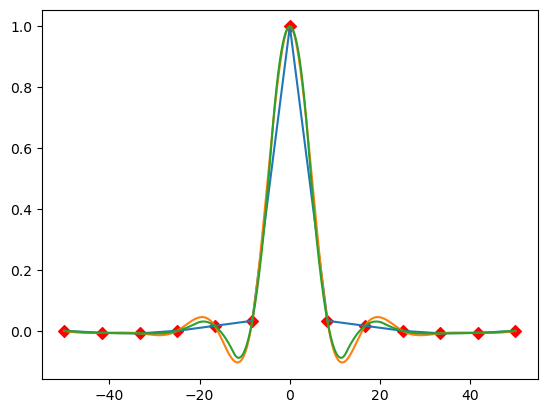

In [11]:
import scipy.interpolate as si
import matplotlib.pyplot as plt
min_x = -50
max_x = 50
dis_x = np.linspace(min_x, max_x, 13)
dis_y = np.sinc(dis_x)

linear = si.interp1d(dis_x, dis_y, kind='linear')
x = np.linspace(min_x, max_x, 1000)
y = linear(x)
y1 = si.interp1d(dis_x, dis_y, kind='cubic')(x)
y2 = si.interp1d(dis_x, dis_y, kind='quadratic')(x)

plt.figure()
plt.scatter(dis_x, dis_y, color='red', marker='D')
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()